In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [137]:
data = pd.read_csv('wine_quality_classification.csv')

In [138]:
data.head()

,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium


In [139]:
data.size

5000

In [140]:
data['quality_label'] = data['quality_label'].map({'high':1, 'medium':2,'low':0})   # encode the values of quality label
data.head()

,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,1
1,11.2,2.0,14.0,0.9912,2
2,11.6,0.9,8.2,0.9935,0
3,12.9,6.6,12.7,1.0002,0
4,13.9,13.8,10.4,0.9942,2


In [141]:
data.duplicated().sum()

np.int64(0)

In [142]:
data.isnull().sum()

fixed_acidity     0
residual_sugar    0
alcohol           0
density           0
quality_label     0
dtype: int64

In [143]:
x = data.drop(['quality_label'],axis=1)
y = data['quality_label']

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled =  scaler.fit_transform(x)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state= 42)

In [146]:
model = SVC(kernel= 'linear')    # another (kernel = 'rbf')
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [147]:
y_pred =  model.predict(x_test)

In [148]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy:{ accuracy *100:.2f}%")
print("classification report:\n",classification_report(y_test, y_pred, zero_division=0))

accuracy:35.67%
classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.37      0.54      0.44       110
           2       0.34      0.48      0.40       100

    accuracy                           0.36       300
   macro avg       0.24      0.34      0.28       300
weighted avg       0.25      0.36      0.29       300



In [149]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean() * 100:.2f}%")

Cross-Validation Scores: [0.405 0.38  0.415 0.355 0.355]
Mean Accuracy: 38.20%


*we used cross val to increase our accuracy*

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

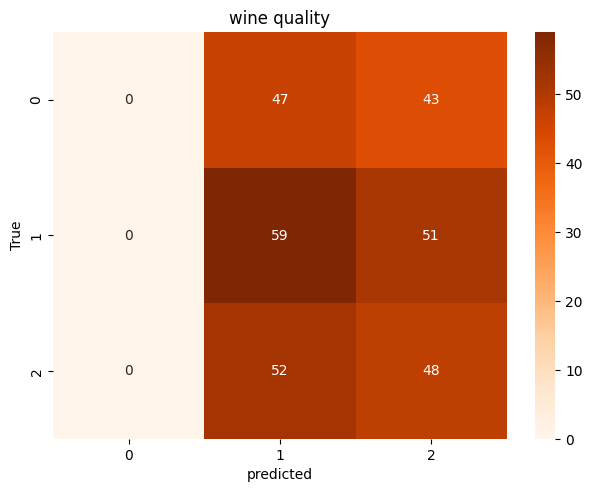

In [151]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Oranges',
            xticklabels= model.classes_, yticklabels= model.classes_)
plt.xlabel('predicted')
plt.ylabel('True')
plt.tight_layout()
plt.title('wine quality')
plt.show()

1. '0'indicates : Low
2. '1' indicates : high 
3. '2' indicates : medium